CLUSTERING WITH PYCARET

In [1]:
use_gpu=True

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

### Installing Pycaret and Importing needed libraries

In [ ]:
pip install pycaret

In [ ]:
import pandas as pd


## Importing dataset

In [ ]:
dataset = pd.read_csv('/content/data.csv')

## Data Description

In [ ]:
dataset.shape

(569, 33)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
dataset.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN


## **Pycaret Setup**

In [ ]:
from pycaret.clustering import *
pycaret_setup = setup(data = dataset,  session_id=123)

,Description,Value
0,Session id,123
1,Original data shape,"(569, 33)"
2,Transformed data shape,"(569, 32)"
3,Ordinal features,1
4,Numeric features,32
5,Categorical features,1
6,Rows with missing values,100.0%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


## Creating Model

In [ ]:
kmeans=create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9766,504327.2314,0.0304,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
kmeans

KMeans(n_clusters=4, random_state=123)

In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.9668,291250.8868,0.0425,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,Cluster
0,842302,M,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,0.14710,...,184.600006,2019.000000,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN,Cluster 0
1,842517,M,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.08690,0.07017,...,158.800003,1956.000000,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN,Cluster 0
2,84300903,M,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,...,152.500000,1709.000000,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN,Cluster 2
3,84348301,M,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.24140,0.10520,...,98.870003,567.700012,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN,Cluster 2
4,84358402,M,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.19800,0.10430,...,152.199997,1575.000000,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,...,166.100006,2027.000000,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN,Cluster 0
565,926682,M,20.129999,28.250000,131.199997,1261.000000,0.09780,0.10340,0.14400,0.09791,...,155.000000,1731.000000,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN,Cluster 0
566,926954,M,16.600000,28.080000,108.300003,858.099976,0.08455,0.10230,0.09251,0.05302,...,126.699997,1124.000000,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN,Cluster 0
567,927241,M,20.600000,29.330000,140.100006,1265.000000,0.11780,0.27700,0.35140,0.15200,...,184.600006,1821.000000,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN,Cluster 0


## **Analyze Model**

In [ ]:
plot_model(kmeans, plot = 'cluster')

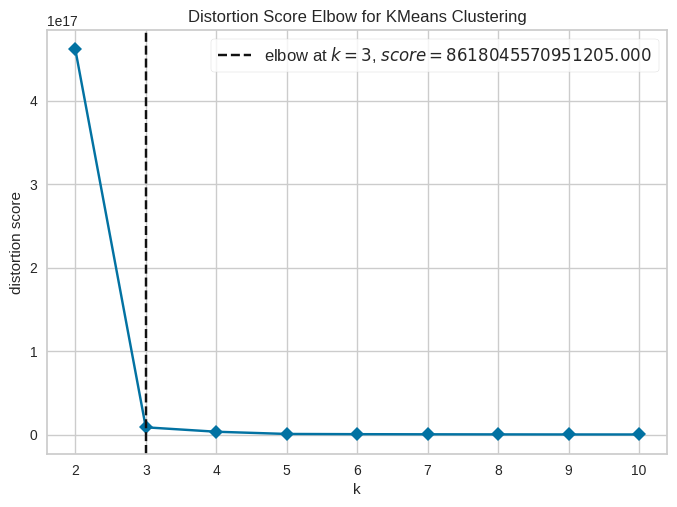

In [ ]:
plot_model(kmeans, plot = 'elbow')

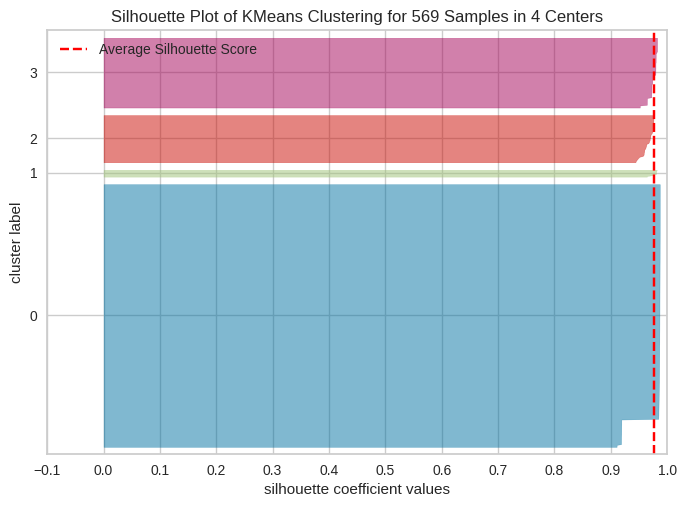

In [ ]:
plot_model(kmeans, plot = 'silhouette')

In [ ]:
save_model(kmeans, 'kmeans')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['id', 'radius_mean',
                                              'texture_mean', 'perimeter_mean',
                                              'area_mean', 'smoothness_mean',
                                              'compactness_mean',
                                              'concavity_mean',
                                              'concave points_mean',
                                              'symmetry_mean',
                                              'fractal_dimension_mean',
                                              'radius_se', 'texture_se',
                                              'perimeter_se', 'area_se',
                                              'smoothness_se',...
                  TransformerWrapper(include=['diagnosis'],
                                     transformer=SimpleImputer(strategy='most_f

In [ ]:
load_model('kmeans')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['id', 'radius_mean',
                                             'texture_mean', 'perimeter_mean',
                                             'area_mean', 'smoothness_mean',
                                             'compactness_mean',
                                             'concavity_mean',
                                             'concave points_mean',
                                             'symmetry_mean',
                                             'fractal_dimension_mean',
                                             'radius_se', 'texture_se',
                                             'perimeter_se', 'area_se',
                                             'smoothness_se',...
                 TransformerWrapper(include=['diagnosis'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['diagnosis'],
                                    transformer=OrdinalEncoder(cols=['diagnosis'],
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'diagnosis',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': B      0
M      1
NaN   -1
dtype: int64}]))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])